In [143]:
import xarray as xr
import numpy as np
import pandas as pd
from glob import glob

In [144]:
base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/pressure-levels/reanalysis/u/'
files = glob(base_dir + '*/u_era5_oper*.nc')

In [176]:
df_list = []
for f in files:

    era5_data = xr.open_dataset(f)
    fn = f.split('/')[-1]
    start_date = fn.split('_')[4].split('-')[0]
    start_date
    year = int(start_date[:4])
    month = int(start_date[4:6])

    fake_pope = era5_data.sel(
        longitude=130.8919, latitude=-12.4247, 
        method='nearest').sel(level=slice(600,800))
    fake_pope = fake_pope.mean(dim='level').squeeze()
    fake_pope = fake_pope.groupby("time.day").mean()
    fake_pope = ((fake_pope['u']>5).astype(int)+1)
    times = fake_pope.day

    dates = np.array(sorted([
        '{:04}-{:02}-{:02}'.format(year, month, int(t))
        for t in times]))

    fake_pope = xr.DataArray(
        fake_pope.values, dims='Dates', 
        coords={'Dates': dates}, name='Regime')
    df_list.append(fake_pope.to_dataframe())
    
df = pd.concat(df_list)

In [177]:
df.to_csv('fake_pope_regimes.csv', header=False)

In [178]:
df_2 = pd.read_csv(
    'Pope_regimes.csv', header=None, 
    names=['Dates', 'Regime'], index_col=0)
df_2

,Regime
Dates,
1998-12-01,2
1998-12-02,4
1998-12-03,5
1998-12-04,5
1998-12-05,5
...,...
2017-02-22,1
2017-02-23,3
2017-02-24,5


In [179]:
df.index

Index(['2005-11-01', '2005-11-02', '2005-11-03', '2005-11-04', '2005-11-05',
       '2005-11-06', '2005-11-07', '2005-11-08', '2005-11-09', '2005-11-10',
       ...
       '2006-04-21', '2006-04-22', '2006-04-23', '2006-04-24', '2006-04-25',
       '2006-04-26', '2006-04-27', '2006-04-28', '2006-04-29', '2006-04-30'],
      dtype='object', name='Dates', length=181)

<AxesSubplot:xlabel='Dates'>

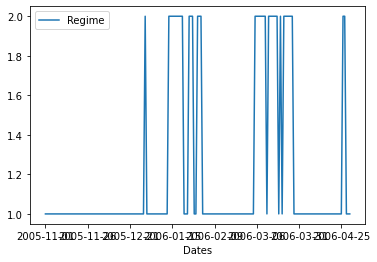

In [180]:
test = (df_2.loc[df.index]==2).astype(int)+1
test.plot()

<AxesSubplot:xlabel='Dates'>

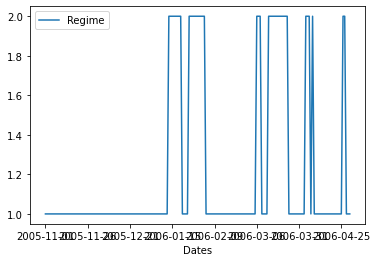

In [181]:
df.plot()